Success!


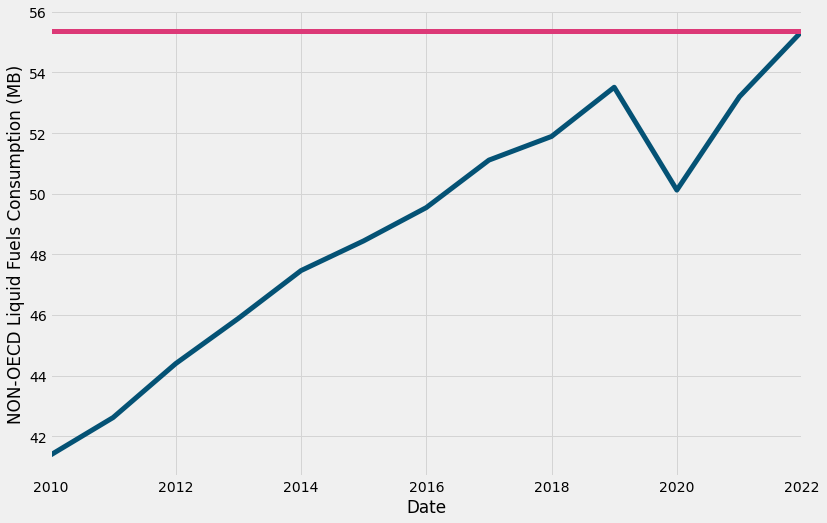

In [1]:
#Import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker




# API Key from EIA
api_key = '4Cgy5BurMNMAhbo0RBIu3s5FFyyo37QEVmW0uBoz'
# PADD Names to Label Columns
# Change to whatever column labels you want to use.
SERIES_NAMES = ['NON-OECD CONSUMPTION']
# Enter all your Series IDs here separated by commas
SERIES_KEY = ['IEO.2021.REFERENCE.CNSM_LIQP_NNN_MBPD.A']
# Initialize list - this is the final list that you will store all the data from the json pull. Then you will use this list to concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2010-01-01'
endDate = '2022-02-20'


# Pull in data via EIA API
for i in range(len(SERIES_KEY)):
    url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + SERIES_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', SERIES_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)



# Combine all the data into one dataframe
crude = pd.concat(final_data, axis=1)
# Create date as datetype datatype
crude['Year'] = crude.index.astype(str)
crude['Month'] = '1'
crude['Day'] = '1'
crude['Date'] = pd.to_datetime(crude[['Year','Month','Day']])

crude.set_index('Date',drop=True,inplace=True)
crude.sort_index(inplace=True)
crude = crude[startDate:endDate]
crude = crude.iloc[:,:5]

#crude['OECD CONSUMPTION']=crude['OECD CONSUMPTION']/1000
crude['NEW']=np.ones(len(crude['NON-OECD CONSUMPTION']))*crude['NON-OECD CONSUMPTION'][-1]

# Generating Colours and Style
colors = {'NON-OECD CONSUMPTION':'#045275','TODAYS LEVEL':'#DC3977'}
plt.style.use('fivethirtyeight')

#fig, ax = plt.subplots()

# Creating the Visualization
plot = crude.plot(figsize=(12,8), 
                  color=list(colors.values()), 
                  linewidth=5, 
                  legend=False)


plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_ylabel('NON-OECD Liquid Fuels Consumption (MB)')

plot.set_xlim([date(2010,1,1),date(2022,6,1)])
#plot.set_ylim([1250,2200])

pngname='total_consumption_non_oecd'
plt.savefig('/Users/peter/projects/oil/post/'+pngname)


In [2]:
crude

,NON-OECD CONSUMPTION,Year,Month,Day,NEW
Date,,,,,
2010-01-01,41.3815,2010,1,1,55.3668
2011-01-01,42.6197,2011,1,1,55.3668
2012-01-01,44.3989,2012,1,1,55.3668
2013-01-01,45.8887,2013,1,1,55.3668
2014-01-01,47.4651,2014,1,1,55.3668
2015-01-01,48.4447,2015,1,1,55.3668
2016-01-01,49.5427,2016,1,1,55.3668
2017-01-01,51.1080,2017,1,1,55.3668
2018-01-01,51.8888,2018,1,1,55.3668
